In [1]:
import tensorflow as tf
import os
from utils import *
from tacotron import Tacotron
from tqdm import tqdm

In [2]:
paths, lengths, texts, raw_texts = [], [], [], []
text_files = [f for f in os.listdir('../mel') if f.endswith('.npy')]
for fpath in text_files:
    text = ' '.join([i for i in os.path.splitext(fpath)[0].split('-') if not i.isdigit()])
    paths.append(fpath.replace('.npy', ''))
    text = text_normalize(text)
    raw_texts.append(text)
    text = text + 'E'
    texts.append(np.array([char2idx[char] for char in text], np.int32))
    lengths.append(len(text))

In [3]:
paths[:2], lengths[:2], texts[:2]

(['tolong-sebut-monogramam', 'sebut-perkataan-man-abintara'],
 [24, 29],
 [array([23, 18, 15, 18, 17, 10,  3, 22,  8,  5, 24, 23,  3, 16, 18, 17, 18,
         10, 21,  4, 16,  4, 16,  2], dtype=int32),
  array([22,  8,  5, 24, 23,  3, 19,  8, 21, 14,  4, 23,  4,  4, 17,  3, 16,
          4, 17,  3,  4,  5, 12, 17, 23,  4, 21,  4,  2], dtype=int32)])

In [4]:
def dynamic_batching(paths):
    files, max_y, max_z = [], 0, 0
    for n in range(len(paths)):
        files.append(get_cached(paths[n]))
        if files[-1][0].shape[0] > max_y:
            max_y = files[-1][0].shape[0]
        if files[-1][1].shape[0] > max_z:
            max_z = files[-1][1].shape[0]
    return files, max_y, max_z

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Tacotron()
sess.run(tf.global_variables_initializer())

minibatch loop: 100%|██████████| 46/46 [00:46<00:00,  1.24it/s, cost=1.7, loss1=0.119, loss2=0.181, loss_att=0.0119, loss_bd1=0.695, loss_bd2=0.695]  


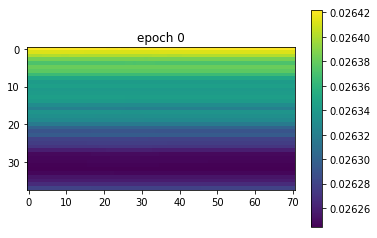

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.41it/s, cost=1.65, loss1=0.104, loss2=0.135, loss_att=0.0119, loss_bd1=0.699, loss_bd2=0.7]   


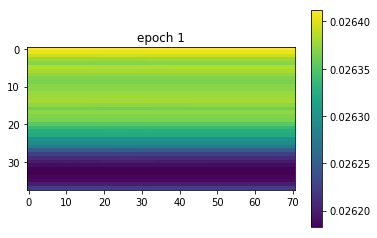

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.58, loss1=0.0818, loss2=0.0753, loss_att=0.0119, loss_bd1=0.705, loss_bd2=0.706]


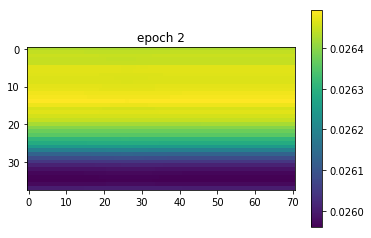

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.41it/s, cost=1.54, loss1=0.0602, loss2=0.0492, loss_att=0.0118, loss_bd1=0.71, loss_bd2=0.708] 


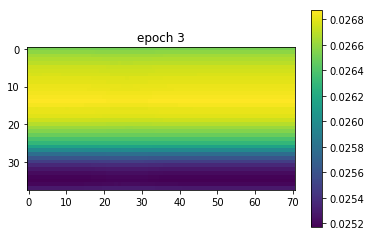

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.41it/s, cost=1.53, loss1=0.0531, loss2=0.0432, loss_att=0.0118, loss_bd1=0.71, loss_bd2=0.708]  


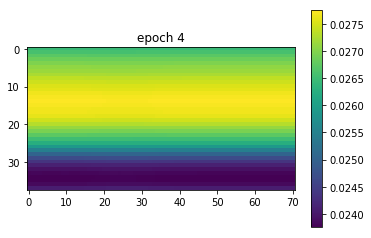

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.52, loss1=0.0475, loss2=0.04, loss_att=0.0113, loss_bd1=0.711, loss_bd2=0.708]   


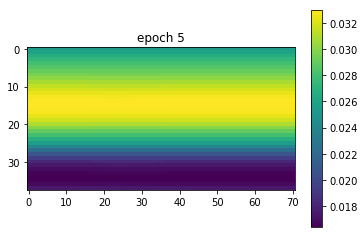

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.41it/s, cost=1.51, loss1=0.0489, loss2=0.0368, loss_att=0.0102, loss_bd1=0.709, loss_bd2=0.707] 


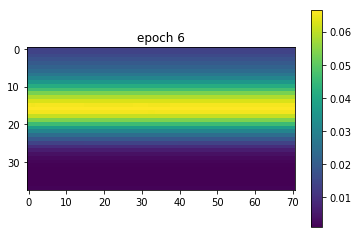

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.51, loss1=0.0447, loss2=0.0346, loss_att=0.00966, loss_bd1=0.71, loss_bd2=0.707] 


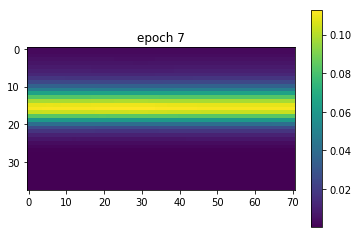

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.5, loss1=0.0411, loss2=0.0323, loss_att=0.00948, loss_bd1=0.71, loss_bd2=0.707]  


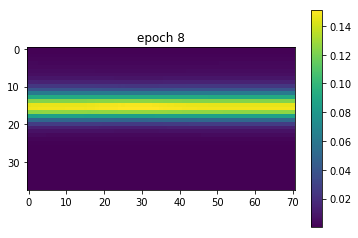

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.5, loss1=0.0407, loss2=0.0316, loss_att=0.00943, loss_bd1=0.71, loss_bd2=0.707]  


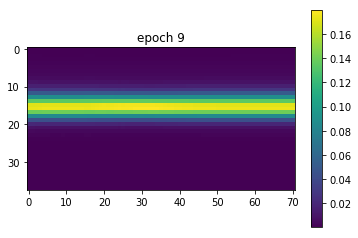

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.5, loss1=0.0385, loss2=0.0306, loss_att=0.00941, loss_bd1=0.711, loss_bd2=0.707] 


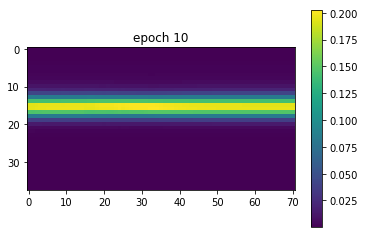

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0373, loss2=0.0301, loss_att=0.00942, loss_bd1=0.711, loss_bd2=0.707]


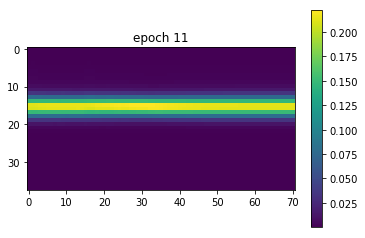

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0363, loss2=0.0297, loss_att=0.00943, loss_bd1=0.711, loss_bd2=0.707]


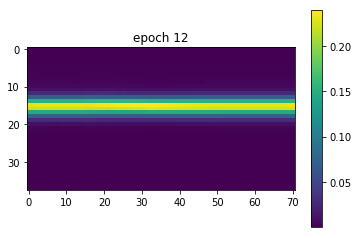

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0346, loss2=0.0285, loss_att=0.00943, loss_bd1=0.712, loss_bd2=0.707]


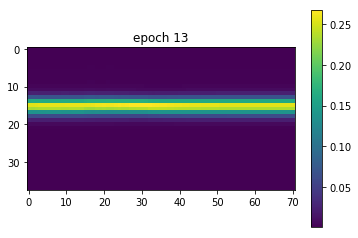

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0344, loss2=0.0281, loss_att=0.00942, loss_bd1=0.711, loss_bd2=0.707]


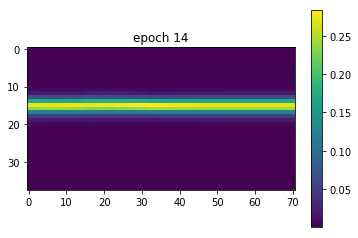

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.49, loss1=0.0325, loss2=0.0278, loss_att=0.0094, loss_bd1=0.713, loss_bd2=0.708] 


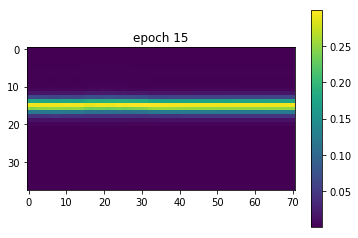

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0325, loss2=0.0276, loss_att=0.00935, loss_bd1=0.712, loss_bd2=0.708]


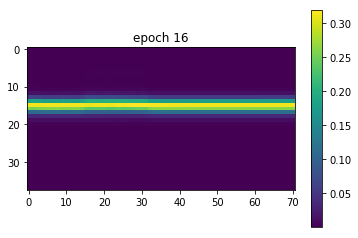

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.49, loss1=0.0316, loss2=0.0274, loss_att=0.00933, loss_bd1=0.712, loss_bd2=0.707]


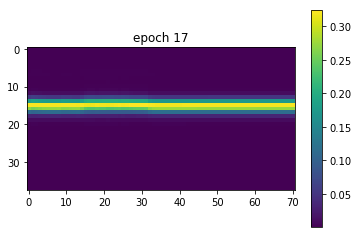

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0312, loss2=0.0294, loss_att=0.00928, loss_bd1=0.712, loss_bd2=0.706]


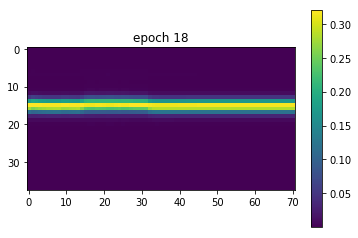

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.44it/s, cost=1.49, loss1=0.0299, loss2=0.0268, loss_att=0.00923, loss_bd1=0.713, loss_bd2=0.707]


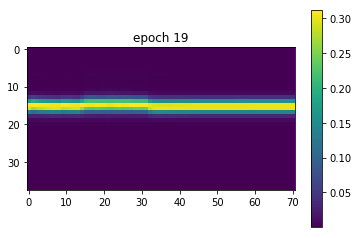

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.49, loss1=0.0297, loss2=0.0267, loss_att=0.00915, loss_bd1=0.713, loss_bd2=0.707]


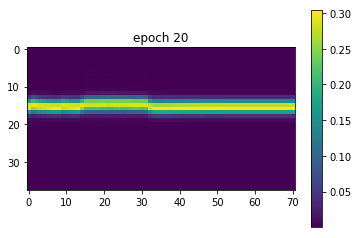

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.49, loss1=0.0312, loss2=0.0265, loss_att=0.00907, loss_bd1=0.711, loss_bd2=0.707]


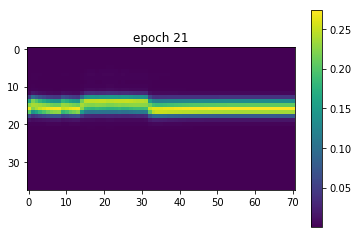

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.44it/s, cost=1.48, loss1=0.0303, loss2=0.0259, loss_att=0.00881, loss_bd1=0.711, loss_bd2=0.708]


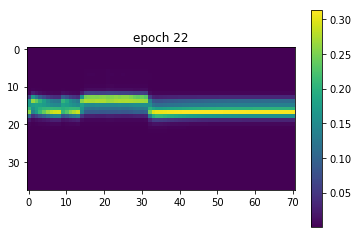

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.43it/s, cost=1.48, loss1=0.0286, loss2=0.0263, loss_att=0.00836, loss_bd1=0.713, loss_bd2=0.707]


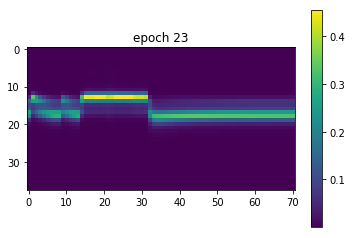

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.44it/s, cost=1.48, loss1=0.029, loss2=0.0264, loss_att=0.00739, loss_bd1=0.713, loss_bd2=0.707] 


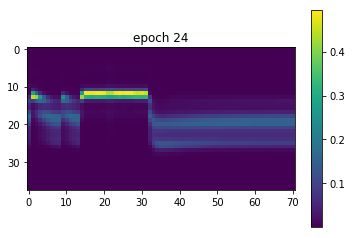

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.44it/s, cost=1.48, loss1=0.0302, loss2=0.0258, loss_att=0.00639, loss_bd1=0.711, loss_bd2=0.707]


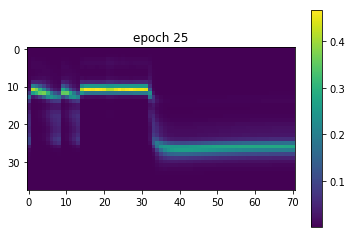

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.44it/s, cost=1.48, loss1=0.0295, loss2=0.0257, loss_att=0.00525, loss_bd1=0.713, loss_bd2=0.707]


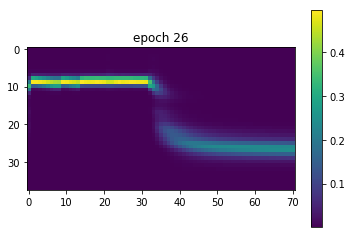

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.45it/s, cost=1.48, loss1=0.0299, loss2=0.0253, loss_att=0.00457, loss_bd1=0.711, loss_bd2=0.707]


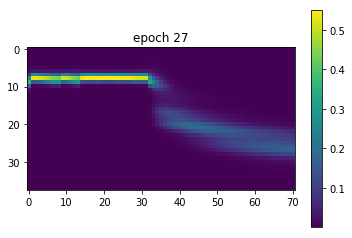

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.46it/s, cost=1.48, loss1=0.0326, loss2=0.0248, loss_att=0.00565, loss_bd1=0.711, loss_bd2=0.708]


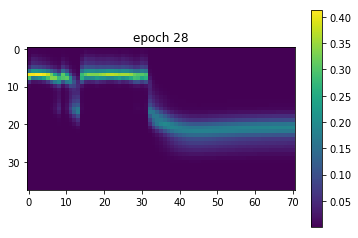

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.43it/s, cost=1.48, loss1=0.0289, loss2=0.0245, loss_att=0.00344, loss_bd1=0.712, loss_bd2=0.707]


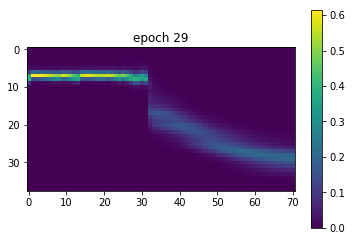

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.43it/s, cost=1.47, loss1=0.0288, loss2=0.0248, loss_att=0.0026, loss_bd1=0.712, loss_bd2=0.707] 


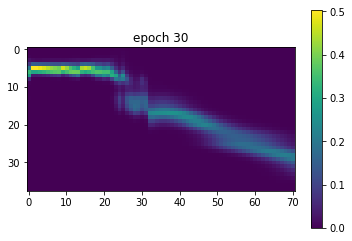

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.028, loss2=0.024, loss_att=0.00156, loss_bd1=0.712, loss_bd2=0.707]   


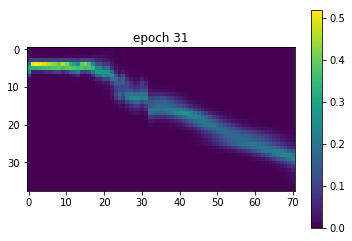

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0279, loss2=0.0251, loss_att=0.00114, loss_bd1=0.712, loss_bd2=0.706] 


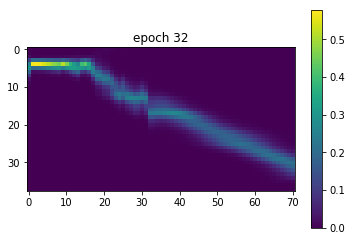

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.0279, loss2=0.024, loss_att=0.00129, loss_bd1=0.712, loss_bd2=0.707]  


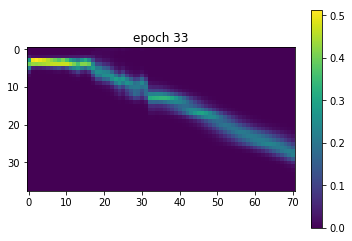

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.0273, loss2=0.0246, loss_att=0.000872, loss_bd1=0.712, loss_bd2=0.706]


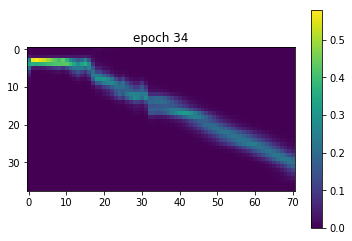

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.43it/s, cost=1.47, loss1=0.0265, loss2=0.0239, loss_att=0.00129, loss_bd1=0.713, loss_bd2=0.707] 


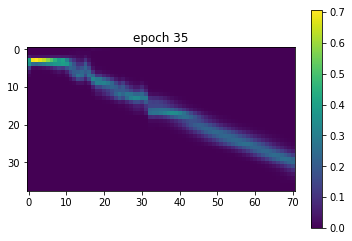

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.46it/s, cost=1.47, loss1=0.0273, loss2=0.0265, loss_att=0.00168, loss_bd1=0.712, loss_bd2=0.706] 


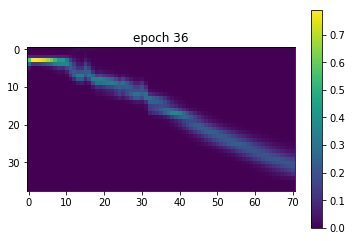

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.0268, loss2=0.0247, loss_att=0.00167, loss_bd1=0.713, loss_bd2=0.708] 


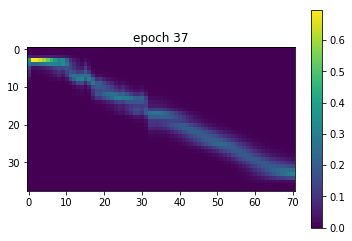

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0271, loss2=0.0247, loss_att=0.00168, loss_bd1=0.712, loss_bd2=0.706] 


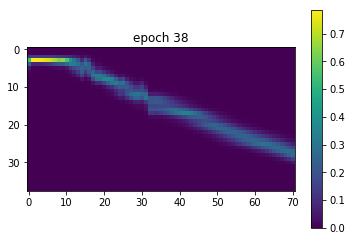

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.026, loss2=0.0229, loss_att=0.000668, loss_bd1=0.713, loss_bd2=0.707] 


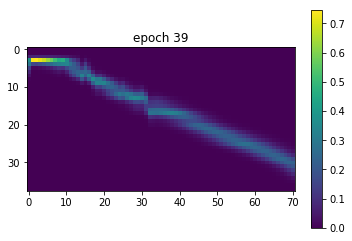

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.026, loss2=0.0232, loss_att=0.000629, loss_bd1=0.713, loss_bd2=0.707] 


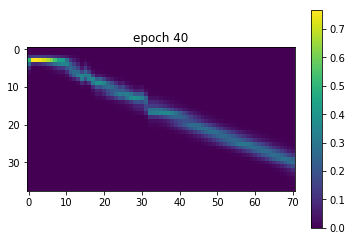

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0263, loss2=0.023, loss_att=0.000562, loss_bd1=0.712, loss_bd2=0.707] 


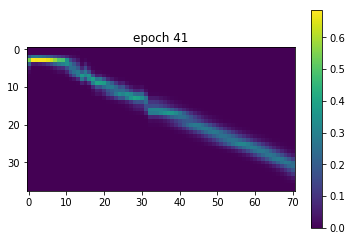

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.0263, loss2=0.0229, loss_att=0.000571, loss_bd1=0.712, loss_bd2=0.707]


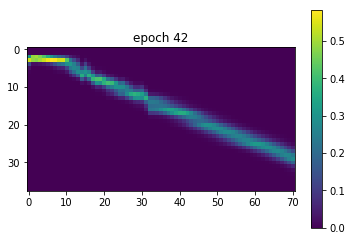

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0261, loss2=0.0233, loss_att=0.000618, loss_bd1=0.712, loss_bd2=0.707]


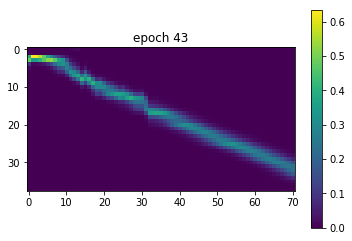

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0253, loss2=0.0229, loss_att=0.000566, loss_bd1=0.713, loss_bd2=0.707]


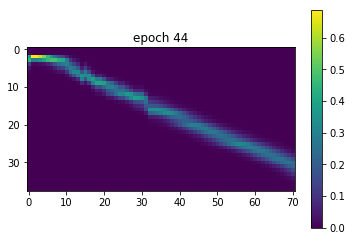

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.42it/s, cost=1.47, loss1=0.0252, loss2=0.0232, loss_att=0.000545, loss_bd1=0.713, loss_bd2=0.707]


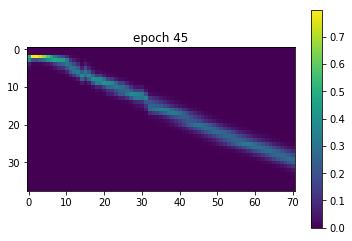

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.45it/s, cost=1.47, loss1=0.0248, loss2=0.0226, loss_att=0.000529, loss_bd1=0.713, loss_bd2=0.708]


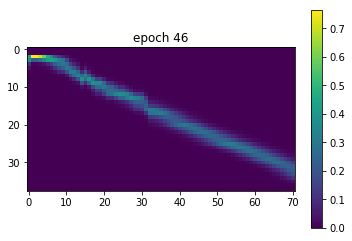

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.45it/s, cost=1.47, loss1=0.0261, loss2=0.023, loss_att=0.000437, loss_bd1=0.711, loss_bd2=0.707] 


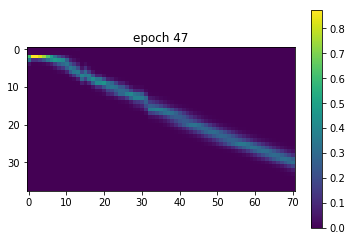

minibatch loop: 100%|██████████| 46/46 [00:32<00:00,  1.44it/s, cost=1.47, loss1=0.0257, loss2=0.0227, loss_att=0.000434, loss_bd1=0.712, loss_bd2=0.707]


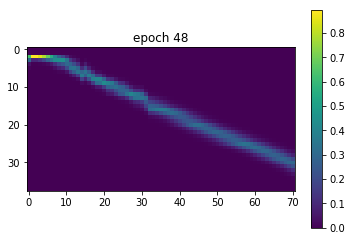

minibatch loop: 100%|██████████| 46/46 [00:33<00:00,  1.42it/s, cost=1.47, loss1=0.0277, loss2=0.0223, loss_att=0.000566, loss_bd1=0.71, loss_bd2=0.707] 


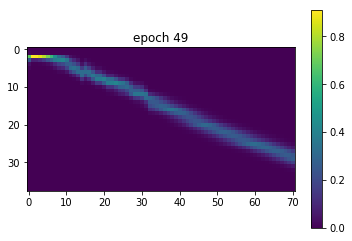

In [6]:
EPOCH = 50
for i in range(EPOCH):
    pbar = tqdm(range(0, len(paths), batch_size), desc = 'minibatch loop')
    for k in pbar:
        index = min(k + batch_size, len(paths))
        files, max_y, max_z = dynamic_batching(paths[k:index])
        max_x = max(lengths[k:index])
        batch_x = np.zeros((batch_size, max_x))
        batch_y = np.zeros((batch_size, max_y, n_mels * resampled))
        batch_z = np.zeros((batch_size, max_z, fourier_window_size // 2 + 1))
        for n in range(len(files)):
            batch_x[n, :] = np.pad(
                texts[k + n],
                ((0, max_x - texts[k + n].shape[0])),
                mode = 'constant',
            )
            batch_y[n, :, :] = np.pad(
                files[n][0],
                ((0, max_y - files[n][0].shape[0]), (0, 0)),
                mode = 'constant',
            )
            batch_z[n, :, :] = np.pad(
                files[n][1],
                ((0, max_z - files[n][1].shape[0]), (0, 0)),
                mode = 'constant',
            )
        _, cost, loss1, loss2, loss_bd1, loss_att, loss_bd2 = sess.run(
            [model.optimizer, model.loss, 
            model.loss1, model.loss2, model.loss_bd1,
            model.loss_att, model.loss_bd2],
            feed_dict = {model.X: batch_x, model.Y: batch_y, model.Z: batch_z},
        )
        pbar.set_postfix(cost = cost, loss1 = loss1, loss2 = loss2, loss_bd1 = loss_bd1,
                        loss_att = loss_att, loss_bd2 = loss_bd2)
    align = sess.run(
        model.alignments, feed_dict = {model.X: batch_x, model.Y: batch_y}
    )
    plot_alignment(align[0, :, :], i)

In [7]:
y_hat = np.ones((1, batch_y.shape[1], n_mels * resampled), np.float32)
for j in tqdm(range(batch_y.shape[1])):
    _y_hat = sess.run(model.Y_hat, {model.X: [texts[0]], model.Y: y_hat})
    y_hat[:, j, :] = _y_hat[:, j, :]

100%|██████████| 71/71 [00:04<00:00, 18.04it/s]


In [14]:
mags = sess.run(model.Z_hat, {model.Y: y_hat})

In [15]:
audio = spectrogram2wav(mags[0])

In [16]:
import IPython.display as ipd
ipd.Audio(audio, rate = sample_rate)

In [12]:
from scipy.io.wavfile import write
write(os.path.join('test.wav'), sample_rate, audio)

In [13]:
real_audio = spectrogram2wav(batch_z[0])
ipd.Audio(real_audio, rate = sample_rate)